# Nearest Neighbor

In [47]:
## # Load libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline


from sklearn.metrics import f1_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [48]:
# retrieve variables
%store -r raw_data
%store -r raw_data_uncorr

In [49]:
## devide train test tentative with stratification to keep the distribution
## raw_data parames [28] / raw_data_uncorr [24]
X = raw_data.iloc[:,:28]
Y = raw_data.iloc[:,28]

X_train, X_test, y_train, y_test = train_test_split(X,Y,
                                                   test_size=0.35,
                                                   stratify=Y)    

KNN works slightly better with 0/1 normalized data (MinMaxScaler).
Also usually it performs better with smaller features dataset. Dimensionality reduction might be necessary.

In [53]:
## https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn
X_train = pd.DataFrame(MinMaxScaler().fit_transform(X_train))
X_test = pd.DataFrame(MinMaxScaler().fit_transform(X_test))

In [54]:
## Kneighbors (default parameter 5)
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=10, n_jobs=-1, verbose=5)
'Accuracy media: {:0.3f}'.format(np.mean(knn_scores))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished


'Accuracy media: 0.574'

In [58]:
## Kneighbors with best found parameters
knn_clf = KNeighborsClassifier(n_neighbors=8)
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=20, n_jobs=-1, verbose=5)
'Accuracy media tuned: {:0.3f}'.format(np.mean(knn_scores))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  15 out of  20 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.1s finished


'Accuracy media tuned: 0.575'

In [59]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [60]:
expected = y_test
predicted = knn_clf.predict(X_test)
knn_cnf_matrix = confusion_matrix(expected, predicted)
knn_score_tuned = cross_val_score(knn_clf, X_test, y_test, cv = 20)
knn = 'Accuracy media tuned: {:0.3f}'.format(np.mean(knn_score_tuned))
knn

'Accuracy media tuned: 0.560'

In [61]:
## Micro-averaging - In micro-averaging method, you sum up the individual true positives, false positives, 
## and false negatives of the system for different sets and the apply them. And the micro-average F1-Score
## will be simply the harmonic mean of above two equations.

f1_score(expected, predicted, average = 'micro')

0.5542857142857143

In [62]:
## In simplest of terms, Hamming-Loss is the fraction of labels that are incorrectly predicted, 
## i.e., the fraction of the wrong labels to the total number of labels.
hamming_loss(expected, predicted)

0.44571428571428573

In [63]:
knn_accuracy = accuracy_score(expected, predicted)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

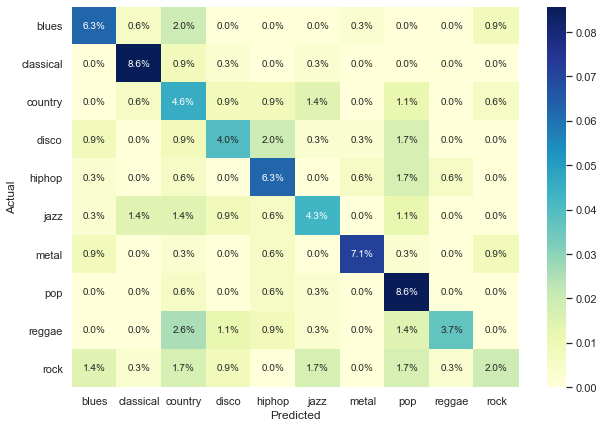

In [64]:
data = knn_cnf_matrix
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.0)#for label size
knn_heatmap = sn.heatmap(df_cm/np.sum(data), cmap="YlGnBu", annot=True, fmt='.1%', annot_kws={"size": 10})# font size
knn_heatmap

In [65]:
%store knn_heatmap
%store knn_cnf_matrix

Stored 'knn' (str)
Stored 'knn_accuracy' (float64)
Stored 'knn_heatmap' (AxesSubplot)
Stored 'knn_cnf_matrix' (ndarray)
